In [12]:
import pandas as pd
from pandas_datareader import data as pdr
from datetime import datetime
import numpy as np
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [13]:
def log_diff(data):
    return 100*np.log(data).diff()

In [14]:
def test_stationarity(data, label = "NULL", lags=15):

    print(f"Stationarity Test for {label}")
    print("-"*len(f"Stationarity Test for {label}"))

    #ADF Test
    adf_result = adfuller(data, autolag="AIC")
    
    print("ADF statistic:", adf_result[0])
    print("p-value:", adf_result[1])
    print("Used lags:", adf_result[2])
    print("Number of observations:", adf_result[3])
    print("Critical values:")
    for k, v in adf_result[4].items():
        print(f"   {k}: {v:.3f}")

    print()
    
    #KPSS Test
    kpss_result = kpss(data, regression="c", nlags="auto")

    print("KPSS statistic:", kpss_result[0])
    print("p-value:", kpss_result[1])
    print("Used lags:", kpss_result[2])
    print("Critical values:")
    for k, v in kpss_result[3].items():
        print(f"   {k}: {v:.3f}")

    #ACF and PACF plots
    fig = plt.figure(figsize=(12, 4))
    ax1 = fig.add_subplot(211)
    plot_acf(data, ax=ax1, lags=lags)
    ax1.set_title(f"ACF of {label}")
    
    ax2 = fig.add_subplot(212)
    plot_pacf(data, ax=ax2, lags=lags)
    ax2.set_title(f"PACF of {label}")
    
    plt.tight_layout()
    plt.show()

In [36]:
def plot_single(series, title="NULL title", label="NULL label", ax=None):
    if ax is None:
        ax = plt.gca()
    series.plot(ax=ax, label=label)
    ax.set_title(title)
    ax.set_xlabel("")
    ax.legend()
    return ax

def plot_single_trio(col, label=None, figsize=(15, 3.5)):
    if label is None:
        label = col

    fig, axes = plt.subplots(1, 3, figsize=figsize)

    plot_single(df_a[col],   title=f"{label}",                  label="Annual",     ax=axes[0])
    plot_single(df_al[col],  title=f"{label}: Log",             label="Annual log", ax=axes[1])
    plot_single(df_ald[col], title=f"{label}: Log Differences", label="Annual Δlog",ax=axes[2])

    plt.tight_layout()
    plt.show()

def plot_pair(series_a, series_q, title, ax,
              label_a="Annual", label_q="Quarterly"):
    series_a.plot(ax=ax, label=label_a)
    series_q.plot(ax=ax, title=title, label=label_q)
    ax.set_xlabel("")
    ax.legend()

def plot_pair_trio(col, label=None, figsize=(12, 4)):
    if label is None:
        label = col

    fig, axes = plt.subplots(1, 3, figsize=figsize)

    plot_pair(df_a[col],   df_q[col],   f"{label}",                 ax=axes[0])
    plot_pair(df_al[col],  df_ql[col],  f"{label}: Log",            ax=axes[1])
    plot_pair(df_ald[col], df_qld[col], f"{label}: Log Differences",ax=axes[2])

    plt.tight_layout()
    plt.show()

# Inputs

In [47]:
start = datetime(1890, 1, 1)
end = datetime.today()

#Annual
#Investment in Government Fixed Assets: Federal: National defense: Intellectual property products: Research and development (I3GDEFN1RD000)
#Federal Government: National Defense Consumption Expenditures and Gross Investment (FDEFX)
#Gross Domestic Product (GDPA)

vars_a = ["GDPCA",  #annual, real & not seasonally adj (b)
          "RTFPNAUSA632NRUG", #annual, 2017=1
          "RIFSPFFNA"] #annual, Federal Funds Effective Rate
labels_a = ["gdp", "tfp", "R"]

vars_q = ["GDPC1"] #quarterly, real & seasonally adj (b)
labels_q = ["gdp"]

In [48]:
df_a = pdr.DataReader(vars_a, 'fred', start, end)
df_a.columns = labels_a
df_a.index = pd.PeriodIndex(df_a.index, freq='Y')

df_a['tfp'] = df_a['tfp']*100

df_q = pdr.DataReader(vars_q, 'fred', start, end)
df_q.columns = labels_q
df_q.index = pd.PeriodIndex(df_q.index, freq='Q')

df_al = np.log(df_a)
df_ql = np.log(df_q)

df_ald = log_diff(df_a)
df_qld = log_diff(df_q)*4 #Annualized rate

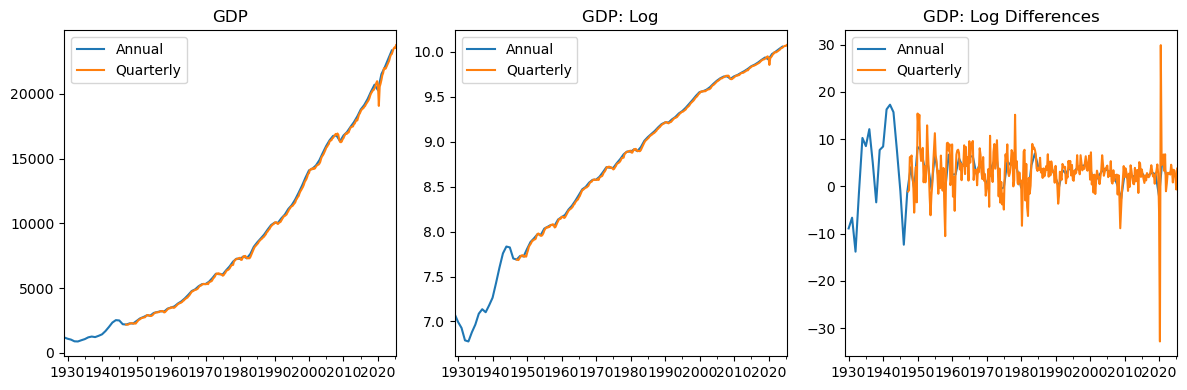

In [49]:
plot_pair_trio("gdp", "GDP")

Stationarity Test for Annual GDP Growth
---------------------------------------
ADF statistic: -3.2326723109306115
p-value: 0.018169678453197818
Used lags: 10
Number of observations: 84
Critical values:
   1%: -3.511
   5%: -2.897
   10%: -2.585

KPSS statistic: 0.09731132175984947
p-value: 0.1
Used lags: 4
Critical values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


/var/folders/w8/rmt0d09s7yd6wt42l__22p3h0000gn/T/ipykernel_26364/1391255180.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(data, regression="c", nlags="auto")


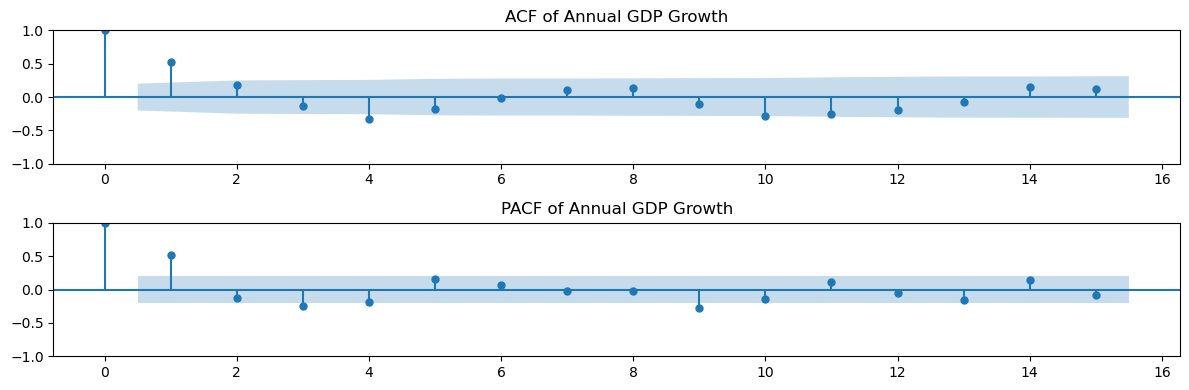

In [50]:
test_stationarity(df_ald['gdp'].dropna(), "Annual GDP Growth", 15)

Stationarity Test for Quarterly GDP Growth
------------------------------------------
ADF statistic: -15.416792490194736
p-value: 3.0717813949990485e-28
Used lags: 0
Number of observations: 312
Critical values:
   1%: -3.451
   5%: -2.871
   10%: -2.572

KPSS statistic: 0.4519091698083523
p-value: 0.05478053025502058
Used lags: 4
Critical values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


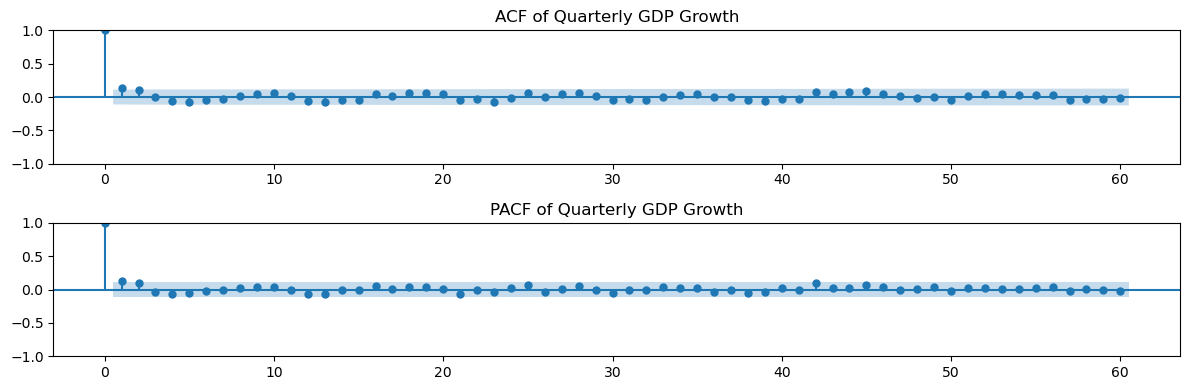

In [51]:
test_stationarity(df_qld['gdp'].dropna(), "Quarterly GDP Growth", 60)

<Axes: title={'center': 'Total Factor Productivity'}>

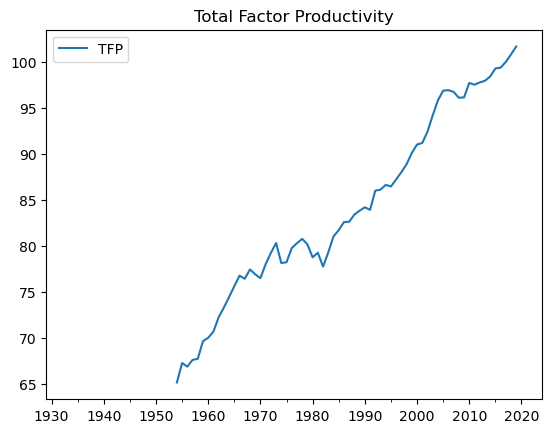

In [52]:
plot_single(df_a.tfp, "Total Factor Productivity", "TFP")

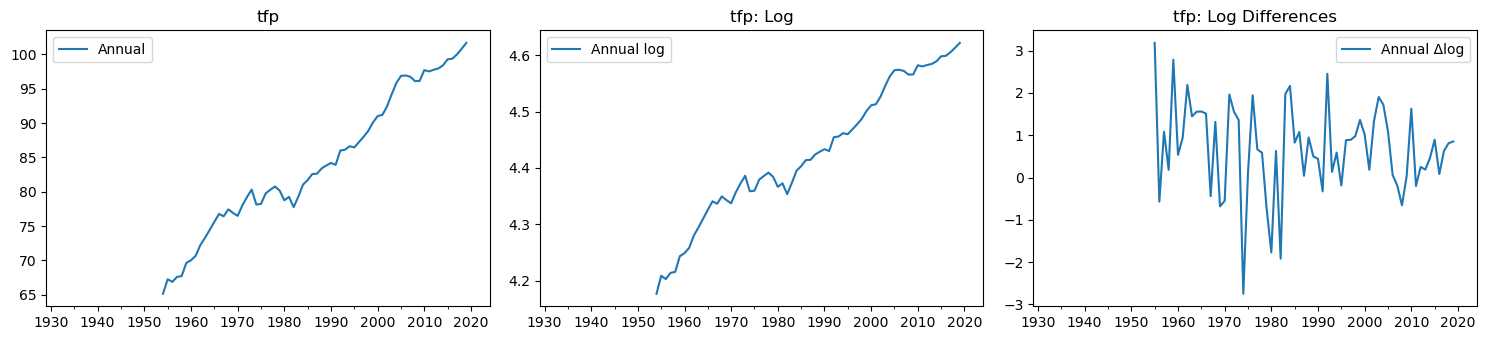

In [53]:
plot_single_trio("tfp")

Stationarity Test for TFP
-------------------------
ADF statistic: -8.187251005273898
p-value: 7.839121238751928e-13
Used lags: 0
Number of observations: 64
Critical values:
   1%: -3.537
   5%: -2.908
   10%: -2.591

KPSS statistic: 0.17592470513696232
p-value: 0.1
Used lags: 0
Critical values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


/var/folders/w8/rmt0d09s7yd6wt42l__22p3h0000gn/T/ipykernel_26364/1391255180.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(data, regression="c", nlags="auto")


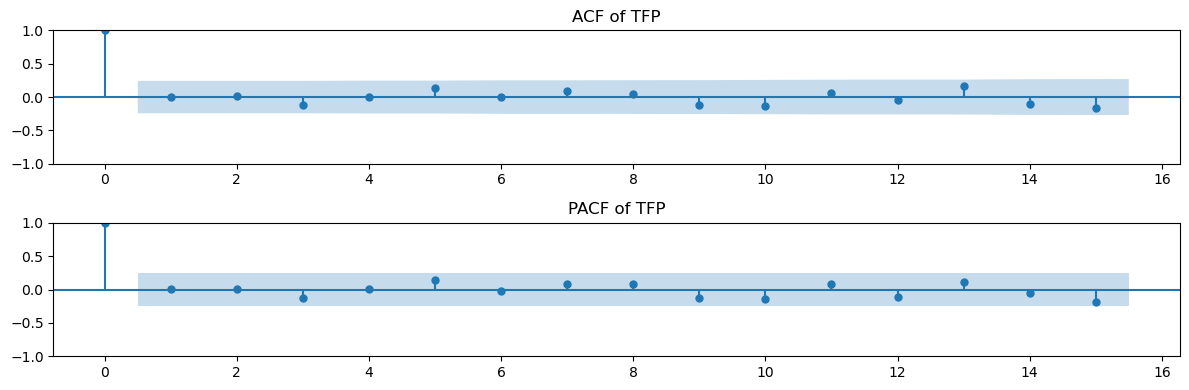

In [54]:
test_stationarity(df_ald['tfp'].dropna(), "TFP")

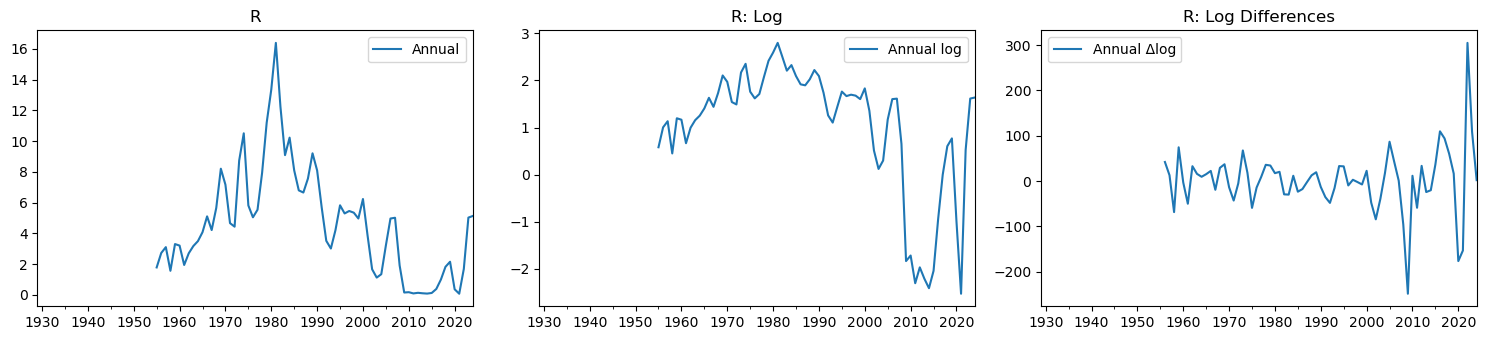

In [56]:
plot_single_trio("R")